# Problem 7- Functions to Multiply ABx in Two Ways

### Author: Jennefer Maldonado

Date Due: 9/9/2020

This Jupyter Notebook contains two methods to compute $(AB)x$ and $A(Bx)$ such that $A,B \in R^{n\times n}$ using NumPy.  

The first function is called _matrix matrix_ which first computes the product of $ A $ and $ B $, then produces the product of $(AB)x$. The second function is called _matrix vector_ which computes the product of $B$ and $x$, then $A(Bx)$.

In [46]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import time

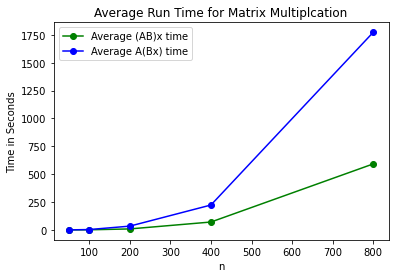

In [47]:
# This function computes (AB)x
# Parameters:
# A - nxn matrix
# B - nxn matrix
# x - vector value
# returns: (AB)x - nxn matrix
def matrix_matrix(A, B, x):
    # start time #
    tic = time.perf_counter()
    # START MATRIX MULTIPLICATION #
    # find the size of the matrix
    n = (A.shape)[0] 
    # create empty nxn matrix to store calculated values
    AB = np.zeros((n,n))
    # j represents the row for A and for AB
    for j in range(0,n):
    # k represents the column for B and AB
        for k in range(0,n):
    # l represents the column of A and row of B
            for l in range(0,n):
            # stores computed value into new matrix 
                AB[j,k] = (AB[j,k] + A[j,l]*B[l,k])
    # START MATRIX VECTOR MULTIPLICATION #
    # create empty nxn matrix to store calculated values
    ABx = np.zeros((n,n))
    # find the row of the matrix
    x_list = x[0]
    for row in range(0,n):
        # find the col of the matrix
        for col in range(0,n):
            ABx[row,col] = ABx[row,col] + (AB[row,col]*x_list[col])
    # end time #
    toc = time.perf_counter()
    return toc-tic, ABx

# Run for n = 50 x [1, 2, 4, 8, 16]
n_values = [50,100,200,400,800]
# stores each run time list
all_times_mm = []
# runs this 3 times to later average out the run time
for i in range(0,2):
    matrix_matrix_times = []
    for n in n_values:
        # matrix full of integers between 0 and 5
        A_matrix = np.random.randint(5,size=(n,n))
        # matrix full of integers between 0 and 5
        B_matrix = np.random.randint(5,size=(n,n))
        # random integer between 0 and 5
        x = np.random.randint(5,size=(1,n))
        #finds the time and matrix
        times, new_matrix = matrix_matrix(A_matrix, B_matrix, x)
        # stores times
        matrix_matrix_times.append(times)  
    # stores times to average later
    all_times_mm.append(matrix_matrix_times)
   
    
# This function computes A(Bx)
# Parameters:
# A - nxn matrix
# B - nxn matrix
# x - vector value
# returns: A(Bx) - nxn matrix
def matrix_vector(A, B, x):
    # start time #
    tic = time.perf_counter()
    # START MATRIX VECTOR MULTIPLICATION #
    # find the size of the matrix
    n = (B.shape)[0]
    # create empty nxn matrix to store calculated values
    Bx = np.zeros((n,n))
    # find the row of the matrix
    x_list = x[0]
    for row in range(0,n):
        # find the col of the matrix
        for col in range(0,n):
            Bx[row,col] = Bx[row,col] + (B[row,col]*x_list[col])
    # START MATRIX MULTIPLICATION #
    # create empty nxn matrix to store calculated values
    ABx = np.zeros((n,n))
    # j represents the row for A and for ABx
    for j in range(0,n):
        # k represents the column for Bx and ABx
        for k in range(0,n):
            # l represents the column of A and row of Bx
            for l in range(0,n):
                ABx[j,k] = (ABx[j,k] + A[j,l]*Bx[l,k])  
    # end time #
    toc = time.perf_counter()
    return toc-tic, ABx
 
# Run for n = 50 x [1, 2, 4, 8, 16]
n_values = [50,100,200,400,800]
# stores lists of times to later average
all_times_ms = []
# repeats 3 times to find average run time performance
for i in range(0,2):
    matrix_vector_times=[]
    for n in n_values:
        # n by n matrix with random values between 0 and 5
        A_matrix = np.random.randint(5,size=(n,n))
        # n by n matrix with random values between 0 and 5
        B_matrix = np.random.randint(5,size=(n,n))
        # random integer between 0 and 5
        x = np.random.randint(5,size=(1,n))
        # gets time and matrix
        times, new_matrix = matrix_vector(A_matrix, B_matrix, x)
        #stores times
        matrix_vector_times.append(times) 
    # stores times to later average them
    all_times_ms.append(matrix_vector_times)

# convert time lists into np arrays
all_times_mm = np.array(all_times_mm)
all_times_ms = np.array(all_times_ms)
# find the average run time for each n
average_mm = np.mean(all_times_mm, axis=0)
average_ms = np.mean(all_times_ms, axis=0)
# Plot the results
plt.plot(n_values, average_mm, label = 'Average (AB)x time', c = 'g', marker='o')
plt.plot(n_values, average_ms, label = 'Average A(Bx) time', c = 'b', marker='o')
plt.title("Average Run Time for Matrix Multiplcation")
plt.xlabel("n")
plt.ylabel("Time in Seconds")
plt.legend()
plt.show()

## Analysis
A typical matrix-matrix multiplication is $O(n^3)$, these functions I have just written compute matrix-matrix multiplication as well as multiplication by a vector $x$ which adds an extra multiplication operation and two more for loops. This means that these functions should be $O(n^5)$. This should typically be avoided and these functions could be optimized slightly by computing the vector multiplication inside the already created for loops for the matrix matrix multiplication, but for assignment clarity I computed each part of the multiplication separately.
For each value of $n = 50 \times [1, 2, 4, 8, 16]$ the amount of operations the code would compute would go as follows:
* $O(50^5) = 3.125 \times 10^8$
* $O(100^5) = 1\times 10^{10}$
* $O(200^5) = 3.2 \times 10^{11}$
* $O(400^5) = 1.024 \times 10^{13}$
* $O(800^5) = 3.2768 \times 10^{14}$

The plot above displays the run times on average after 3 executions of the code using **matplotlib**. At first my intuition was wrong, I believed that since there was a fixed amount of floating-point operations and loops in each function, despite computing them in a different order, they would take the same time to complete. After the visualization, clearly $(AB)x$ performs much faster than $A(Bx)$ and now I believe this is due to the size of the integers in each matrix. 

Another factor that could speed up this code is using the built-in matrix-vector multiplication which would save the addition and multiplication in the loop. Either way this code is definitely not the most efficient due to the number of floating-point operations and large use of for loops but displays the importance of built in multiplication libraries and refactoring and improving upon code. As well as highlights the importance of understanding $O$ notation for writing code for real world applications.